확률적경사하강법<br>
새로운 데이터가 추가될 때마다 새로운 모델을 생성/학습<br>
기존의 모델과 모델 세팅등을 최대한 유지하면서 업데이트하는 최적화 방법. 알고리즘 모델은 아님. 즉, 훈련방법 또는 최적화 방법임<br>
-확률적경사하강법 : 훈련세트를 한번 모두 사용하는 과정<br>
-미니배치 경사하강법 : 여러개씩 꺼내기<br>
-배치경사 하강법 : 몽땅꺼내기<br>
에포크 : 훈련세트를 한번 모두 사용하는 과정<br>
손실함수는 0에 가까울수록 아주 큰음수가 되기 때문에 손실을 아주크게만들어 모델에 큰 영향을 끼침

In [1]:
import pandas as pd

fish = pd.read_csv("https://bit.ly/fish_data")
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [2]:
#데이터전처리
fish_input = fish[["Weight","Length1","Length2","Length3","Height","Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

In [3]:
#훈련세트와 테스트세트나누기
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
#데이터전처리 : 표준화
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


print(f"트레이닝 데이터 전처리 전\n{train_input[:2]}")
print(f"트레이닝 데이터 전처리 후\n{train_scaled[:2]}")
print(f"테스트 데이터 전처리 전\n{test_input[:2]}")
print(f"테스트 데이터 전처리 후\n{test_scaled[:2]}")

트레이닝 데이터 전처리 전
[[720.      32.      35.      40.6     16.3618   6.09  ]
 [500.      42.      45.      48.       6.96     4.896 ]]
트레이닝 데이터 전처리 후
[[ 0.91965782  0.56916037  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.57197475  1.54653445  1.45316551 -0.46981663  0.27291745]]
테스트 데이터 전처리 전
[[78.     16.8    18.7    19.4     5.1992  3.1234]
 [13.4    11.7    12.4    13.5     2.43    1.269 ]]
테스트 데이터 전처리 후
[[-0.88741352 -0.9551175  -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.46655284 -1.50842035 -1.54345461 -1.58849582 -1.93803151]]


In [5]:
#확률적경사하강법 : 분류
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss="log_loss", max_iter=10, random_state=42)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7983193277310925
0.875


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [6]:
#모델 이어서 훈련 : partial_fit()
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7815126050420168
0.75


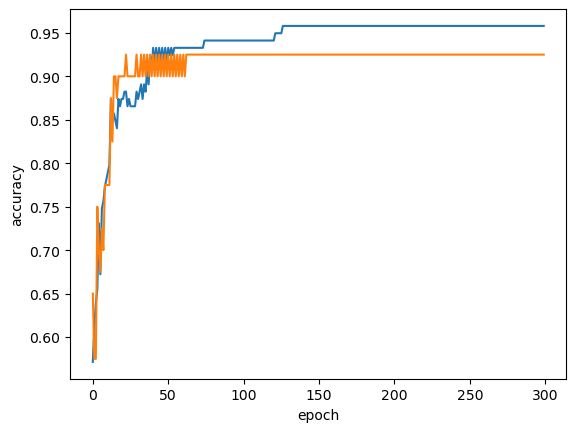

In [7]:
import numpy as np

sc = SGDClassifier(loss="log_loss",random_state=42)
train_score = list()
test_score = list()
classes = np.unique(train_target)

#에포크 300번 진행
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [8]:
sc = SGDClassifier(loss="log_loss", max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9495798319327731
0.925
